average rating: 3.653225806451613
calulated rating: 3.689311524809329
actual rating: 3.0


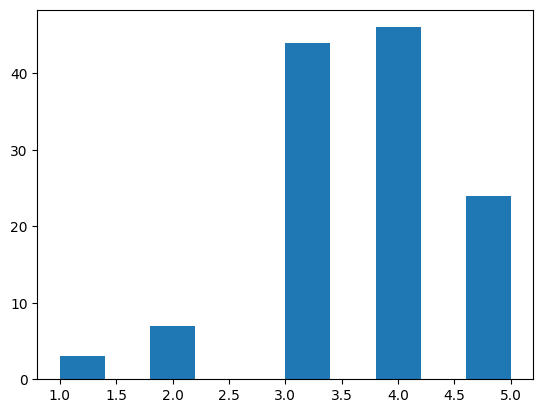

countMatrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
cosinesim: [[0.03703704]
 [0.0860663 ]
 [0.12309149]
 [0.        ]
 [0.04199605]
 [0.0410305 ]
 [0.03513642]
 [0.        ]
 [0.        ]
 [0.04012862]
 [0.        ]
 [0.        ]
 [0.04012862]
 [0.04012862]
 [0.04012862]
 [0.04303315]
 [0.        ]
 [0.04199605]
 [0.03774257]
 [0.04012862]
 [0.        ]
 [0.11785113]
 [0.08206099]
 [0.        ]
 [0.        ]
 [0.03636965]
 [0.16051447]
 [0.        ]
 [0.04199605]
 [0.04012862]
 [0.04303315]
 [0.07698004]
 [0.08025724]
 [0.08206099]
 [0.08830216]
 [0.1132277 ]
 [0.14814815]
 [0.        ]
 [0.22645541]
 [0.        ]
 [0.04199605]
 [0.0860663 ]
 [0.0860663 ]
 [0.        ]
 [0.08206099]
 [0.07856742]
 [0.        ]
 [0.        ]
 [0.03253   ]
 [0.046676  ]
 [0.12038585]
 [0.04303315]
 [0.04415108]
 [0.09072184]
 [0.        ]
 [0.        ]
 [0.0410305 ]
 [0.10910895]
 [0.03774257]
 [0.        ]
 [0.04415108]
 [

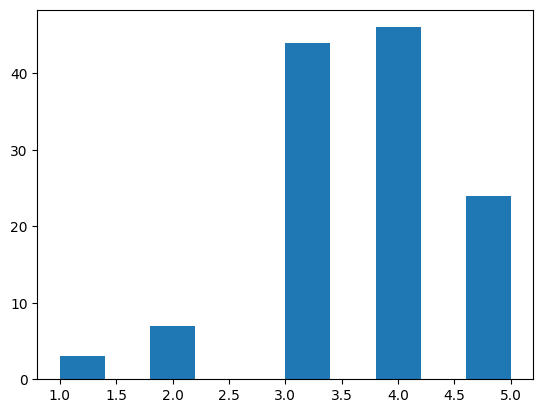

In [8]:
import pandas as pd
from scipy import sparse
import pandas as pd
import numpy as np
from numpy import var
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

#load data
ratings = pd.read_csv('dataset/ratings.csv')
moviesPartial = pd.read_csv('dataset/movies.csv')
moviesFull = pd.read_csv('dataset/movie_dataset.csv')

#drop duplicates
moviesFull.drop_duplicates(subset = 'title', inplace=True)

#drop columns that do nothing
ratings = ratings.drop(['timestamp'], axis = 1)
moviesPartial = moviesPartial.drop(['genres'],axis=1)

#two users ratings to be tested
firstUserRatings  = ratings[ratings['userId'] ==6]
secondUserRating = ratings[ratings['userId'] ==6]

#remove the year and keep the name
moviesPartial['title'] = moviesPartial['title'].map(lambda string: string[:-7])

#drop duplicates
moviesPartial.drop_duplicates(subset = 'title', inplace=True)


#helper functions:
def get_title_from_movieId(tmp):
    return moviesPartial[moviesPartial["movieId"]== tmp]["title"].to_string(index=False)
def checkTitle(tmp):
    if(tmp not in list(moviesFull["title"])):
        #The word "the" is being apended to the ends of titles
        tmp = tmp[-3:] +" "+ tmp[:-5]
        return moviesFull[moviesFull["title"] == tmp]["title"].to_string(index=False)
    else:
        return moviesFull[moviesFull["title"] == tmp]["title"].to_string(index=False)


firstUserTitles = []
newFirstUserRatings = []
for rating, id in zip(list(firstUserRatings["rating"]), list(firstUserRatings["movieId"])):
    title = get_title_from_movieId(id)
    checked = checkTitle(title)
    if(checked != 'Series([], )'):
        firstUserTitles.append(checked)
        newFirstUserRatings.append(rating)


secondUserTitles = []
newSecondUserRating = []
for rating, id in zip(list(secondUserRating["rating"]), list(secondUserRating["movieId"])):
    title = get_title_from_movieId(id)
    checked = checkTitle(title)
    if(checked != 'Series([], )'):
        secondUserTitles.append(checked)
        newSecondUserRating.append(rating)




fullInfo1 = pd.DataFrame(columns = list(moviesFull.columns))
fullInfo2 = pd.DataFrame(columns = list(moviesFull.columns))


i = 0
for name in firstUserTitles:
    if(len(moviesFull[moviesFull["title"] == name]) !=0):
        fullInfo1.loc[i] = moviesFull[moviesFull["title"] == name].iloc[0]
    i+=1

i = 0
for name in secondUserTitles:
    if(len(moviesFull[moviesFull["title"] == name]) !=0):
        fullInfo2.loc[i] = moviesFull[moviesFull["title"] == name].iloc[0]
    i+=1


features = ['keywords','cast','genres','director']

for feature in features:
    fullInfo1[feature] = fullInfo1[feature].fillna('')
colNumbers1 = []
for feature in features:   
    colNumbers1.append(fullInfo1.columns.get_loc(feature))
fullData1 = []
for index, row in fullInfo1.iterrows():
    temp = []
    for i in range(len(fullInfo1.columns)):
        temp.append(row[i])
    fullData1.append(temp)


for feature in features:
    fullInfo2[feature] = fullInfo2[feature].fillna('')
colNumbers2 = []
for feature in features:   
    colNumbers2.append(fullInfo2.columns.get_loc(feature))
fullData2 = []
for index, row in fullInfo2.iterrows():
    temp = []
    for i in range(len(fullInfo2.columns)):
        temp.append(row[i])
    fullData2.append(temp)



combined_features1 = []
index =0
for row in fullData1:
    #fullData1[index].append(row[colNumbers1[0]]+" "+row[colNumbers1[1]]+" "+row[colNumbers1[2]]+" "+row[colNumbers1[3]])
    combined_features1.append(row[colNumbers1[0]]+" "+row[colNumbers1[1]]+" "+row[colNumbers1[2]]+" "+row[colNumbers1[3]])
    index+=1
# testDataSet = fullData1[0:int(len(fullData1)/2)]
# trainDataSet = fullData1[int(len(fullData1)/2):len(fullData1)]



combined_features2 = []
index =0
for row in fullData2:
    #fullData2[index].append(row[colNumbers2[0]]+" "+row[colNumbers2[1]]+" "+row[colNumbers2[2]]+" "+row[colNumbers2[3]])
    combined_features2.append(row[colNumbers2[0]]+" "+row[colNumbers2[1]]+" "+row[colNumbers2[2]]+" "+row[colNumbers2[3]])
    index+=1
# testDataSet = fullData2[0:int(len(fullData2)/2)]
# trainDataSet = fullData2[int(len(fullData2)/2):len(fullData2)]



cv = CountVectorizer() 
count_matrix = cv.fit_transform(combined_features1)
cosine_sim = cosine_similarity(count_matrix)
average = sum(newFirstUserRatings[1:])/(len(newFirstUserRatings)-1)
print("average rating:",average)
similairities = list(cosine_sim[0])[1:]
ratings = newFirstUserRatings[1:]
sim_sum = sum(similairities)

totalRating = 0
for sim, rating in zip(similairities, ratings):
    totalRating += (sim/sim_sum)*(rating)
print("calulated rating:", totalRating)
print("actual rating:", newFirstUserRatings[0])

plt.hist(ratings, 10)
plt.show()
# f = Fitter(ratings,distributions=['gamma','lognorm',"beta", "burr","norm"])
# f.fit()
# f.summary()


def transform1(arr):
    ret = []
    for item in arr:
        if(item<=.5):
            ret.append(1/item)
        if(item>.5):
            ret.append(-1*(1/(1-item)))
    return ret

def transform2(arr):
    ret = []
    for item in arr:
        ret.append(1/item)
    return ret



cv = CountVectorizer() 
count_matrix = cv.fit_transform(combined_features2).toarray()



#lst = [count_matrix[0]]*(count_matrix.shape[1]-1)

print("countMatrix:", count_matrix)
#print("lst", lst)


cosine_sim = cosine_similarity(X =count_matrix[1:count_matrix.shape[1]],
                                Y = [count_matrix[0]])

print("cosinesim:", cosine_sim)

average = sum(newSecondUserRating[1:])/(len(newSecondUserRating)-1)

print("average rating:",average)

print(type(cosine_sim))

# for item in cosine_sim:
#     similairities.append(item[0])
similairities = np.reshape(cosine_sim,  (len(cosine_sim)))

ratings = newSecondUserRating[1:]

print("ratings:", ratings)


scores = stats.zscore(ratings)
#print(scores)
p_values = norm.sf(scores)
#print(p_values)
vals1 = transform1(p_values)
#print(vals1)

scores = stats.zscore(similairities)
#print(scores)
p_values = norm.sf(scores)
#print(p_values)
vals2 = transform2(p_values)
#print(vals2)


totalRating = 0

s1 = abs(sum(vals1))
s2 = abs(sum(vals2))

#a sense of scale is missing
#the 10 in the equation can be scaled
#a linear model can use it as input

for val1, val2,sim, rating in zip(vals1, vals2, similairities, ratings):
    totalRating += (val1/s1)*(val2/s2)*40
    

print("calulated rating:", average+totalRating)
print("actual rating:", newSecondUserRating[0])

plt.hist(ratings, 10)
plt.show()
# f = Fitter(ratings,distributions=['gamma','lognorm',"beta", "burr","norm"])
# f.fit()
# f.summary()


